# Testing the *CoupledNormal* class

In [1]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
path = r'C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\nsc\util'
sys.path.insert(1, path)
import function as f

import function_john as fj

import coupled_probability_quad_int as cpqi
import function as func
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Define the loc, scale, alpha, and kappas that will be used for all distributions.
loc, scale = 0, 1
alpha = 2

coupled_normal = fj.CoupledNormal(loc=loc,
                                  scale=scale,
                                  kappa=0,
                                  alpha=alpha)

other_coupled_normal = fj.CoupledNormal(loc=loc,
                                        scale=scale,
                                        kappa=0.1,
                                        alpha=alpha)

dim = 1
support = (-np.inf, np.inf)

# Testing the *coupled_cross_entropy* function

In [2]:
cpqi.coupled_cross_entropy(coupled_normal.prob, 
                           other_coupled_normal.prob, 
                           kappa=0, 
                           alpha=alpha, 
                           dim=dim, 
                           support=support,
                           root=False)

C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\function_john.py:151: RuntimeWarning: overflow encountered in exp
  coupled_exp_value = np.exp(values)


1.4301347991968971

In [3]:
cpqi.coupled_cross_entropy(coupled_normal.prob, 
                           other_coupled_normal.prob, 
                           kappa=0, 
                           alpha=alpha, 
                           dim=dim, 
                           support=support,
                           root=True)

1.6603613132872717

# Testing the *coupled_entropy* function

In [4]:
cpqi.coupled_entropy(coupled_normal.prob, 
                     kappa=0, 
                     alpha=alpha, 
                     dim=dim, 
                     support=support,
                     root=False)

C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_probability_quad_int.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  return density_func_q(x)**(-alpha)
C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_probability_quad_int.py:103: RuntimeWarning: invalid value encountered in double_scalars
  return (my_coupled_probability(x)
C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_probability_quad_int.py:112: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  final_integration = -quad(no_root_coupled_cross_entropy,


nan

In [5]:
cpqi.coupled_entropy(coupled_normal.prob, 
                     kappa=0, 
                     alpha=alpha, 
                     dim=dim, 
                     support=support,
                     root=True)

C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_probability_quad_int.py:125: RuntimeWarning: invalid value encountered in double_scalars
  return (my_coupled_probability(x)
C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_probability_quad_int.py:133: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  final_integration = quad(root_coupled_cross_entropy,


nan

In [6]:
cpqi.coupled_entropy(other_coupled_normal.prob, 
                     kappa=0, 
                     alpha=alpha, 
                     dim=dim, 
                     support=support,
                     root=False)

1.5212624929756797

In [7]:
cpqi.coupled_entropy(other_coupled_normal.prob, 
                     kappa=0, 
                     alpha=alpha, 
                     dim=dim, 
                     support=support,
                     root=True)

1.7002427202587915

# Testing the *coupled_divergence* function

In [8]:
cpqi.coupled_divergence(coupled_normal.prob, 
                        other_coupled_normal.prob, 
                        kappa=0, 
                        alpha=alpha, 
                        dim=dim, 
                        support=support,
                        root=False)

nan

In [9]:
cpqi.coupled_divergence(coupled_normal.prob, 
                        other_coupled_normal.prob, 
                        kappa=0, 
                        alpha=alpha, 
                        dim=dim, 
                        support=support,
                        root=True)

nan

In [10]:
cpqi.coupled_divergence(other_coupled_normal.prob, 
                        coupled_normal.prob, 
                        kappa=1, 
                        alpha=alpha, 
                        dim=dim, 
                        support=support,
                        root=False)

inf

In [11]:
cpqi.coupled_divergence(other_coupled_normal.prob, 
                        coupled_normal.prob, 
                        kappa=1, 
                        alpha=alpha, 
                        dim=dim, 
                        support=support,
                        root=True)

inf

# Plotting the *coupled_entropy* function

In [12]:
from scipy.integrate import quad
from mpmath import nsum

def shannon_entropy(density_func, support=(-np.inf, np.inf), continuous=True):
    def density_func_entropy(x):
        return density_func(x) * np.log(density_func(x))
    if continuous:
        entropy = -quad(density_func_entropy, a=support[0], b=support[1])[0]
    else:
        entropy = np.float64(nsum(density_func_entropy, support))
    return 

In [13]:
from tqdm import tqdm
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
plot_tsallisEntropyNormalized = []
plot_tsallisEntropy = []
plot_tsallisEntropyRootNormalized = []
plot_tsallisEntropyRoot = []
plot_shannonEntropy = []
plot_shannonEntropy_root = []
plot_shannonEntropyAlt = []

kappa_values = [round(value, 1) for value in np.linspace(0, 4, 81)]
n = len(kappa_values)

mu, sigma = 0, 1
alpha = 2
for i in tqdm(range(len(kappa_values))):
    kappa = kappa_values[i]
    temp_normal = fj.CoupledNormal(loc=loc,
                                   scale=scale,
                                   kappa=kappa,
                                   alpha=alpha)
    y = temp_normal.prob
    Y[kappa] = cpqi.coupled_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, root=False)
    plot_coupledEntropy.append(Y[kappa])
    Y[kappa] = cpqi.coupled_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, root=True)
    plot_coupledEntropy_root.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=False)
    plot_tsallisEntropyNormalized.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=False)
    plot_tsallisEntropy.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=True)
    plot_tsallisEntropyRootNormalized.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=True)
    plot_tsallisEntropyRoot.append(Y[kappa])
    Y[kappa] = cpqi.shannon_entropy(y, dim=dim, support=support, root=False)
    plot_shannonEntropy.append(Y[kappa])
    Y[kappa] = shannon_entropy(y, support=support)
    plot_shannonEntropyAlt.append(Y[kappa])
    Y[kappa] = cpqi.shannon_entropy(y, dim=dim, support=support, root=True)
    plot_shannonEntropy_root.append(Y[kappa])

  0%|          | 0/81 [00:00<?, ?it/s]<ipython-input-12-7a57bc24a33d>:6: RuntimeWarning: divide by zero encountered in log
  return density_func(x) * np.log(density_func(x))
<ipython-input-12-7a57bc24a33d>:6: RuntimeWarning: invalid value encountered in double_scalars
  return density_func(x) * np.log(density_func(x))
<ipython-input-12-7a57bc24a33d>:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  entropy = -quad(density_func_entropy, a=support[0], b=support[1])[0]
100%|██████████| 81/81 [00:16<00:00,  5.05it/s]


In [14]:
plot_coupledEntropy = np.array(plot_coupledEntropy)
plot_coupledEntropy_root = np.array(plot_coupledEntropy_root)
plot_tsallisEntropyNormalized = np.array(plot_tsallisEntropyNormalized)
plot_tsallisEntropy = np.array(plot_tsallisEntropy)
plot_tsallisEntropyRootNormalized = np.array(plot_tsallisEntropyRootNormalized)
plot_tsallisEntropyRoot = np.array(plot_tsallisEntropyRoot)
plot_shannonEntropy = np.array(plot_shannonEntropy)
plot_shannonEntropyAlt = np.array(plot_shannonEntropyAlt)
plot_shannonEntropy_root = np.array(plot_shannonEntropy_root)

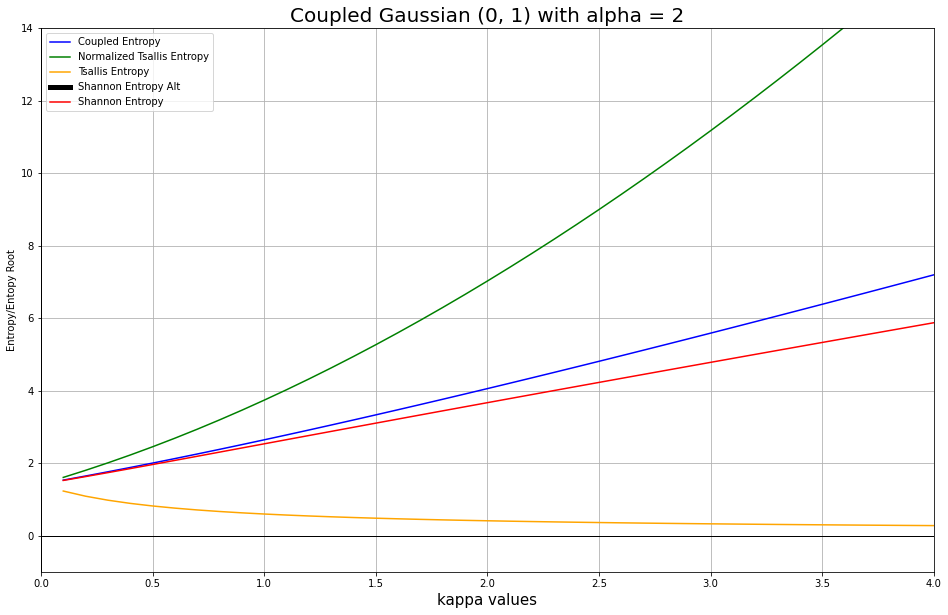

In [15]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 14)
plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Normalized Tsallis Entropy',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropyAlt, label='Shannon Entropy Alt',
         color='black', linewidth=5)
plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy',
         color='red')

plt.grid()
plt.title(f'Coupled Gaussian {round(mu), round(sigma)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

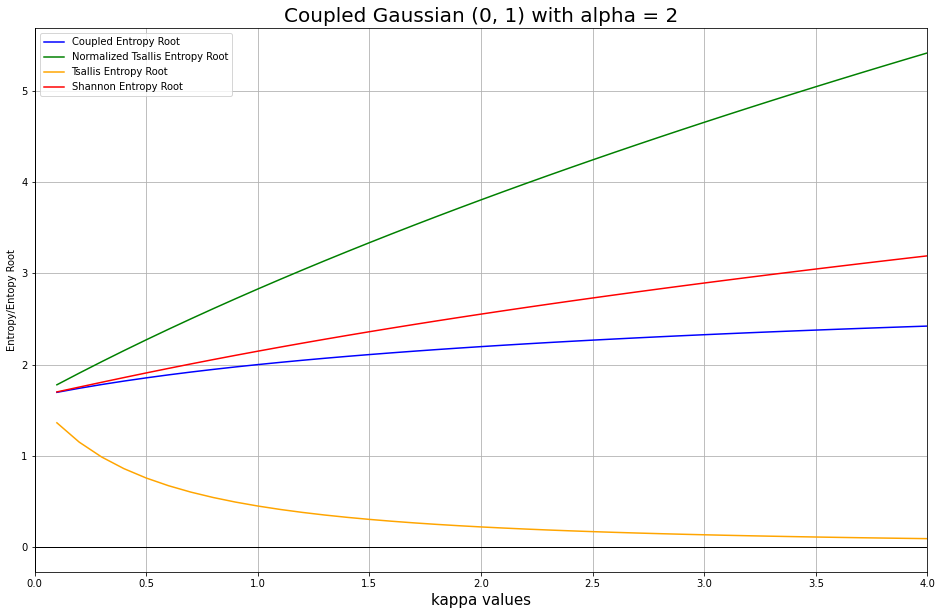

In [16]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
#plt.ylim(-1, 6)

plt.plot(kappa_values, plot_coupledEntropy_root, label='Coupled Entropy Root',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyRootNormalized, label='Normalized Tsallis Entropy Root',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropyRoot, label='Tsallis Entropy Root',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy_root, label='Shannon Entropy Root',
         color='red')
plt.grid()
plt.title(f'Coupled Gaussian {round(mu), round(sigma)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

In [17]:
coupled_normal = fj.CoupledNormal(loc=loc,
                                  scale=scale,
                                  kappa=0.014,
                                  alpha=alpha)

cpqi.coupled_entropy(coupled_normal.prob, 
                     kappa=0, 
                     alpha=alpha, 
                     dim=dim, 
                     support=support,
                     root=False)

C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\function_john.py:157: RuntimeWarning: overflow encountered in double_scalars
  coupled_exp_value = ((1 + kappa*values)**(1/(kappa /
C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_probability_quad_int.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  return density_func_q(x)**(-alpha)
C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_probability_quad_int.py:103: RuntimeWarning: invalid value encountered in double_scalars
  return (my_coupled_probability(x)
C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_probability_quad_int.py:112: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  final_integration = -quad(no_root_coupled_cross_entropy,


nan

In [18]:
p = 0.6

geometric_pmf = lambda k: (1-p)**(k-1) * p

def density_func_entropy(x):
    return geometric_pmf(x) * np.log(geometric_pmf(x))
nsum(density_func_entropy, [0, np.inf])
#shannon_entropy(geometric_pmf, support=(1, np.inf), continuous=False)
#cpqi.shannon_entropy(geometric_pmf, support=(0, np.inf), continuous=False)

TypeError: loop of ufunc does not support argument 0 of type mpf which has no callable log method